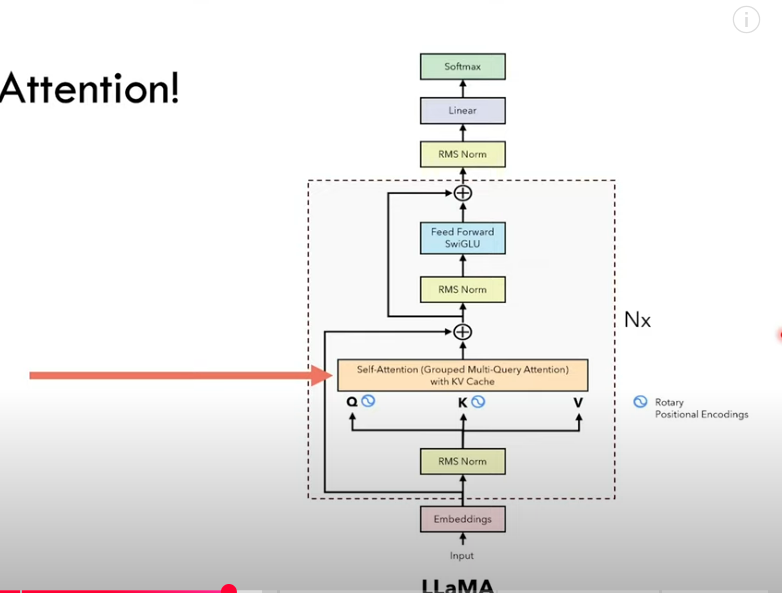

In [ ]:
import torch.nn as nn
import torch
import numpy as np
import math

In [22]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt


--2025-06-18 08:46:33--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-06-18 08:46:33 (18.8 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [23]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [12]:
class SimpleTokenizer:
    def __init__(self, text=None):
        if text:
            vocab = sorted(set(text))
            self.stoi = {ch: i for i, ch in enumerate(vocab)}
            self.itos = {i: ch for ch, i in self.stoi.items()}
            self.vocab_size = len(self.stoi)
        else:
            self.stoi = {}
            self.itos = {}
            self.vocab_size = 0

    def build_vocab(self, text):
        text.split()
        vocab = sorted(set(text))
        self.stoi = {ch: i for i, ch in enumerate(vocab)}
        self.itos = {i: ch for ch, i in self.stoi.items()}
        self.vocab_size = len(self.stoi)

    def encode(self, text):
        return torch.tensor([self.stoi[c] for c in text], dtype=torch.long)

    def decode(self, tokens):
        return ''.join([self.itos[int(i)] for i in tokens])


In [21]:
# Тренировочный текст
corpus = "привет, мир! как дела? я — llama!"

# Создание токенизатора
tokenizer = SimpleTokenizer(corpus)

# Токенизация
tokens = tokenizer.encode("как дела?")
print(tokens)  # >>> tensor([...])

# Обратное преобразование
decoded = tokenizer.decode(tokens)
print(decoded)  # >>> "как дела?"


tensor([12,  7, 12,  0,  9, 10, 13,  7,  3])
как дела?


In [39]:
# Создание токенизатора
tokenizer = SimpleTokenizer(text)

# Токенизация
tokens = tokenizer.encode("Before we proceed")
print(tokens)  # >>> tensor([...])

# Обратное преобразование
decoded = tokenizer.decode(tokens)
print(decoded)  # >>> "как дела?"

tensor([14, 43, 44, 53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42])
Before we proceed


In [ ]:
x = []
for f in chars:
  x.append(stoi[f])
print(x)
x = np.array(x)
print(x.shape)

[0, 1, 2, 3]
(4,)


In [ ]:
emb = torch.from_numpy(x)
print(emb.shape)

torch.Size([4])


In [ ]:
inp = 'hi'
def load_glove(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove('/content/glove.6B.100d.txt')
emb = glove_embeddings[inp]

In [ ]:
emb = torch.from_numpy(emb)


TypeError: expected np.ndarray (got Tensor)

In [ ]:

def rmssnorm(x):
  rms_norm = nn.RMSNorm([4])

  return rms_norm(x)

RuntimeError: "rms_norm" not implemented for 'Long'

In [ ]:
q = emb_norm
k = emb_norm
v = emb_norm

RoPE

In [ ]:
import torch
import math

def rope(x):
    """
    x: (batch_size, seq_len, dim) — входной тензор
    Возвращает x с применённым Rotary Positional Encoding
    """
    batch_size, seq_len, dim = x.size()
    assert dim % 2 == 0, "Размерность должна быть чётной для разделения на пары"

    # Позиции
    pos = torch.arange(seq_len, dtype=torch.float32, device=x.device).unsqueeze(1)  # (seq_len, 1)

    # Частоты
    dim_half = dim // 2
    freqs = 1.0 / (10000 ** (torch.arange(0, dim_half, 1.0, device=x.device) / dim_half))  # (dim/2)
    freqs = pos * freqs  # (seq_len, dim/2)

    # Синус и косинус
    sin = torch.sin(freqs).unsqueeze(0)  # (1, seq_len, dim/2)
    cos = torch.cos(freqs).unsqueeze(0)  # (1, seq_len, dim/2)

    x1 = x[:, :, 0::2]
    x2 = x[:, :, 1::2]

    # Применяем поворот
    x_rotated_0 = x1 * cos - x2 * sin
    x_rotated_1 = x2 * cos + x1 * sin

    # Сливаем
    x_out = torch.stack((x_rotated_0, x_rotated_1), dim=-1)  # (batch, seq_len, dim/2, 2)
    x_out = x_out.flatten(2)  # (batch, seq_len, dim)

    return x_out


In [ ]:
q_r = rope(emb)
#k_r = rope(k)

ValueError: not enough values to unpack (expected 3, got 1)

self-attenton

In [ ]:
class GMQA(nn.Module):
  def __init__(self):
    super().__init__()
    self.d_k = 100
    self.num_heads = 1
    self.W_Q = nn.Linear(100, 100)
    self.W_K = nn.Linear(100, 100)
    self.W_V = nn.Linear(100, 100)
    self.W_A = nn.Linear(100, 100)
  def foward(self):
    # Линейные преобразования и разбиение на головы
    Q = self.W_Q(Q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
    K = self.W_K(K).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
    V = self.W_V(V).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
    print(Q)
    p

    # Вычисляем внимание
    for i in range(len(Q)):
      scores = torch.matmul(Q[i], K[0].transpose(-2, -1)) / torch.sqrt(torch.tensor(self.d_k, dtype=torch.float32))
      weights = F.softmax(scores, dim=-1)
      output = torch.matmul(weights, V)

    # Конкатенируем головы и применяем линейное преобразование
    output = output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
    return self.W_O(output), weights


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GMQA(nn.Module):
    def __init__(self, d_model=100, num_heads=4, num_kv_groups=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model должно делиться на num_heads"
        assert num_heads % num_kv_groups == 0, "num_heads должно делиться на num_kv_groups"

        self.d_model = d_model
        self.num_heads = num_heads
        self.num_kv_groups = num_kv_groups
        self.d_k = d_model // num_heads

        self.W_Q = nn.Linear(d_model, d_model)
        self.W_K = nn.Linear(d_model, d_model // num_heads * num_kv_groups)
        self.W_V = nn.Linear(d_model, d_model // num_heads * num_kv_groups)
        self.W_O = nn.Linear(d_model, d_model)

        # KV cache
        self.register_buffer("cached_k", None)
        self.register_buffer("cached_v", None)

    def forward(self, x, use_cache=False, past_kv=None):
        """
        x: (B, T, D)
        use_cache: bool — добавлять ли текущие K/V в кэш
        past_kv: tuple — (k, v) из прошлого шага (если есть)
        """

        batch_size, seq_len, _ = x.size()

        Q = self.W_Q(x).view(batch_size, seq_len, self.num_heads, self.d_k).transpose(1, 2)  # (B, H, T, D)

        kv_dim = self.d_k * self.num_kv_groups
        K = self.W_K(x).view(batch_size, seq_len, self.num_kv_groups, self.d_k).transpose(1, 2)  # (B, G, T, D)
        V = self.W_V(x).view(batch_size, seq_len, self.num_kv_groups, self.d_k).transpose(1, 2)  # (B, G, T, D)

        # Если есть кэш — добавляем к прошлым значениям
        if past_kv is not None:
            past_k, past_v = past_kv
            K = torch.cat([past_k, K], dim=2)
            V = torch.cat([past_v, V], dim=2)

        # Повторяем K/V до H голов
        kv_repeat = self.num_heads // self.num_kv_groups
        K_rep = K.repeat_interleave(kv_repeat, dim=1)  # (B, H, T, D)
        V_rep = V.repeat_interleave(kv_repeat, dim=1)

        # Attention
        attn_scores = torch.matmul(Q, K_rep.transpose(-2, -1)) / (self.d_k ** 0.5)
        attn_weights = F.softmax(attn_scores, dim=-1)
        context = torch.matmul(attn_weights, V_rep)  # (B, H, T, D)

        # Слияние голов
        context = context.transpose(1, 2).contiguous().view(batch_size, seq_len, self.d_model)
        output = self.W_O(context)

        # Обновляем кэш, если нужно
        present_kv = (K, V) if use_cache else None
        return output, attn_weights, present_kv


feed foward swiglu

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SwigLU(nn.Module):
    def forward(self, x):
        x1, x2 = x.chunk(2, dim=-1)  # Делим на две половины
        return F.silu(x1) * x2       # Swish(x1) * x2

class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim * 2),  # Удваиваем для split на SwigLU
            SwigLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim)
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
import torch
import torch.nn.functional as F

@torch.no_grad()
def generate(model, idx, max_new_tokens):
    """
    model: твоя модель, содержащая GMQA и KV-кэш
    idx: (B, T) — начальный контекст
    max_new_tokens: сколько токенов сгенерировать
    """
    model.eval()
    past_kv = None

    for _ in range(max_new_tokens):
        # Получаем embedding для текущего токена
        input_token = idx[:, -1:]  # (B, 1)

        # Получаем логиты и обновлённый кэш
        logits, _, present_kv = model(input_token, past_kv=past_kv, use_cache=True)

        # Логиты только последнего токена
        logits = logits[:, -1, :]  # (B, vocab_size)
        probs = F.softmax(logits, dim=-1)

        # Сэмплируем след. токен
        idx_next = torch.multinomial(probs, num_samples=1)  # (B, 1)

        # Добавляем токен к последовательности
        idx = torch.cat((idx, idx_next), dim=1)  # (B, T+1)

        # Обновляем кэш
        past_kv = present_kv

    return idx


In [ ]:
def get_batch(data, block_size, batch_size, device):
    """
    data: torch.Tensor (1D) — вся последовательность токенов (train_data или val_data)
    block_size: int — длина контекста
    batch_size: int — размер батча
    device: torch.device — куда класть тензоры (cpu/cuda)
    """
    ix = torch.randint(0, len(data) - block_size - 1, (batch_size,), device=device)

    x = torch.stack([data[i:i + block_size] for i in ix])  # (B, block_size)
    y = torch.stack([data[i + 1:i + block_size + 1] for i in ix])  # (B, block_size)

    return x, y


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

# --- RMSNorm ---
class RMSNorm(nn.Module):
    def __init__(self, dim, eps=1e-8):
        super().__init__()
        self.eps = eps
        self.scale = nn.Parameter(torch.ones(dim))

    def forward(self, x):
        norm = x.norm(dim=-1, keepdim=True) / math.sqrt(x.shape[-1])
        return self.scale * x / (norm + self.eps)

# --- RoPE из твоей реализации ---
def rope(x):
    # x: (B, H, T, D)
    B, H, T, D = x.shape
    assert D % 2 == 0, "Embedding dim must be even"
    device = x.device
    dim_half = D // 2

    pos = torch.arange(T, device=device).unsqueeze(-1)               # (T, 1)
    freqs = 1.0 / (10000 ** (torch.arange(0, dim_half, device=device).float() / dim_half))  # (D//2,)
    angles = pos * freqs                                             # (T, D//2)
    sin = torch.sin(angles)[None, None, :, :]                        # (1, 1, T, D//2)
    cos = torch.cos(angles)[None, None, :, :]                        # (1, 1, T, D//2)

    x1 = x[..., 0::2]  # (B, H, T, D//2)
    x2 = x[..., 1::2]  # (B, H, T, D//2)

    x_rotated = torch.cat([x1 * cos - x2 * sin, x2 * cos + x1 * sin], dim=-1)  # (B, H, T, D)
    return x_rotated


# --- GMQA из твоей реализации ---
class GMQA(nn.Module):
    def __init__(self, d_model=128, num_heads=4, num_kv_groups=1):
        super().__init__()
        assert d_model % num_heads == 0
        assert num_heads % num_kv_groups == 0

        self.d_model = d_model
        self.num_heads = num_heads
        self.num_kv_groups = num_kv_groups
        self.d_k = d_model // num_heads

        self.W_Q = nn.Linear(d_model, d_model)
        self.W_K = nn.Linear(d_model, d_model // num_heads * num_kv_groups)
        self.W_V = nn.Linear(d_model, d_model // num_heads * num_kv_groups)
        self.W_O = nn.Linear(d_model, d_model)

    def forward(self, x, past_kv=None, use_cache=False):
        B, T, _ = x.shape
        Q = self.W_Q(x).view(B, T, self.num_heads, self.d_k).transpose(1, 2)  # (B, H, T, D)
        K = self.W_K(x).view(B, T, self.num_kv_groups, self.d_k).transpose(1, 2)  # (B, G, T, D)
        V = self.W_V(x).view(B, T, self.num_kv_groups, self.d_k).transpose(1, 2)  # (B, G, T, D)

        # RoPE применим к Q и K
        Q = rope(Q)
        K = rope(K)

        if past_kv is not None:
            past_k, past_v = past_kv
            K = torch.cat([past_k, K], dim=2)
            V = torch.cat([past_v, V], dim=2)

        kv_repeat = self.num_heads // self.num_kv_groups
        K_rep = K.repeat_interleave(kv_repeat, dim=1)
        V_rep = V.repeat_interleave(kv_repeat, dim=1)


        attn_scores = torch.matmul(Q, K_rep.transpose(-2, -1)) / (self.d_k ** 0.5)
        attn_weights = F.softmax(attn_scores, dim=-1)
        context = torch.matmul(attn_weights, V_rep)

        context = context.transpose(1, 2).contiguous().view(B, T, self.d_model)
        output = self.W_O(context)

        present_kv = (K, V) if use_cache else None
        return output, attn_weights, present_kv

# --- FeedForward с SwigLU ---
class SwigLU(nn.Module):
    def forward(self, x):
        x1, x2 = x.chunk(2, dim=-1)
        return F.silu(x1) * x2

class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim * 2),
            SwigLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim)
        )

    def forward(self, x):
        return self.net(x)

# --- Основная модель ---
class LlamaLike(nn.Module):
    def __init__(self, vocab_size, d_model=128, num_heads=4, num_kv_groups=1, hidden_dim=200):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.rms1 = RMSNorm(d_model)
        self.gmqa = GMQA(d_model, num_heads, num_kv_groups)
        self.rms2 = RMSNorm(d_model * 2)  # после конкатенации
        self.ff = FeedForward(d_model * 2, hidden_dim)
        self.rms3 = RMSNorm(d_model * 3)  # после второй конкатенации
        self.out_proj = nn.Linear(d_model * 3, vocab_size)

    def forward(self, idx, past_kv=None, use_cache=False):
        x = self.embedding(idx)
        x = self.rms1(x)

        gmqa_out, attn_weights, present_kv = self.gmqa(x, past_kv=past_kv, use_cache=use_cache)

        concat1 = torch.cat([x, gmqa_out], dim=-1)
        concat1_norm = self.rms2(concat1)
        ff_out = self.ff(concat1_norm)

        concat2 = torch.cat([gmqa_out, ff_out], dim=-1)
        concat2_norm = self.rms3(concat2)

        logits = self.out_proj(concat2_norm)
        return logits, present_kv

    @torch.no_grad()
    def generate(self, idx, max_new_tokens):
        past_kv = None
        for _ in range(max_new_tokens):
            logits, past_kv = self.forward(idx, past_kv=past_kv, use_cache=True)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1)
            idx = torch.cat([idx, next_token], dim=1)
        return idx


In [106]:
def train(model, data, optimizer, criterion, epochs=3, batch_size=32, block_size=32, device='cpu'):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for _ in range(len(data) // batch_size):
            ix = torch.randint(0, len(data) - block_size - 1, (batch_size,), device=device)
            x = torch.stack([data[i:i + block_size] for i in ix])
            y = torch.stack([data[i + 1:i + block_size + 1] for i in ix])

            optimizer.zero_grad()
            logits, _ = model(x)

            loss = criterion(logits.view(-1, logits.size(-1)), y.view(-1))
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        avg_loss = total_loss / (len(data) // batch_size)
        print(f"Epoch {epoch+1}: loss={avg_loss:.4f}")



In [107]:
vocab_size = 69

text.lower()
tokens = torch.tensor(tokenizer.encode(text[:100000]), dtype=torch.long)

In [102]:
print(text[:100000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [52]:
tokens  = (torch.tensor(tokens))

In [108]:
# создаём модель
model = LlamaLike(vocab_size=vocab_size)

# создаём оптимизатор
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)

# создаём функцию потерь
criterion = nn.CrossEntropyLoss()

# запускаем обучение
train(
    model=model,
    data=tokens,
    optimizer=optimizer,
    criterion=criterion
)


Epoch 1: loss=0.2223
Epoch 2: loss=0.0648
Epoch 3: loss=0.0598


In [29]:
def chat(model, tokenizer, prompt, max_new_tokens=50, device='cpu'):
    model.eval()
    input_ids = torch.tensor([tokenizer.encode(prompt)], dtype=torch.long, device=device)

    with torch.no_grad():
        output_ids = model.generate(input_ids, max_new_tokens=max_new_tokens)

    output_text = tokenizer.decode(output_ids[0].tolist())
    return output_text


In [33]:
# Простейший словарь (токенизатор) на основе символов
class CharTokenizer:
    def __init__(self, chars):
        self.chars = sorted(set(chars))
        self.stoi = {ch: i for i, ch in enumerate(self.chars)}
        self.itos = {i: ch for ch, i in self.stoi.items()}

    def encode(self, text):
        return [self.stoi[ch] for ch in text]

    def decode(self, tokens):
        return ''.join([self.itos[token] for token in tokens])


In [118]:
torch.save(model.state_dict(), 'LLama2pth')


In [117]:
vocab = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,!?:;'\n-&3$#@э!?*")
tokenizer = CharTokenizer(vocab)
vocab_size = len(tokenizer.chars)
print(vocab_size)
#model = LlamaLike(vocab_size=vocab_size, d_model=128, num_heads=4, num_kv_groups=1)

# пример запроса
prompt = "We are accounted poor citizens, the patricians good."
response = chat(model, tokenizer, prompt, max_new_tokens=30)
print(response)


69
We are accounted poor citizens, the patricians good..

Vt eoceogr
'Le oest, Wecth

